# Recurrent Neural Networks

**План**

1.   Простое введение
2.   Теория
3.   Процесс обучения и предсказания
4.   Проблемы
5.   LSTM
6.   Затухание градиента
7.   GRU
8.   Эмбеддинги
9.   Код



## Пункт 1

У нас бывают данные разных типов, например, изображения (подаются как пиксели) или последовательность слов (предложения, речь и тд), и полносвязные нейронные сети плохо справляются с таким видом задач, поскольку линейные преоброзования в полносвязных рассматривают пиксели (в случае картинок) или слова (в случае текста) независимо друг от друга, а смысл задачи состоит в том, как эти пиксели/слова сгруппированы. Поэтому хочется найти какие-то преобразования, которые учитывают сложную структуру наших данных (слова идут последовательно друг за другом) лучше, чем обычные NN. 

Рассмотрим **рекуррентные нейронные сети** на примере текстовых данных

Начнём с простых примеров. Продолжим фразу:

**Сегодня утром лил сильный дождь, поэтому в университет я взял с собой ...**

Очевидно, что зонт или дождевик. 

На основании начала предложения мы продолжили предложение так, чтобы это было осмысленно.

Воспользуемся таким же концептом для рекуррентных нейронных сетей

Назовём то, что было до слова "зонт" (Сегодня утром лил сильный дождь, поэтому в университет я взял с собой) контекстом, на основании которого мы хотим предсказать следующее слово.

Сделаем небольшое требование, что данный контекст должен быть вектором фиксированной размерности вне зависимости от длины предложения. 

То есть предложения: "Сегодня утром" и "Сегодня утром лил сильный дождь" будут разными векторами, но будут иметь одинаковую размерность (например, 128)

Второе требование: мы наращиваем наш контекст, добавляя по одному слову:

**Сегодня**

**Сегодня утром**

**Сегодня утром лил**

И так далее

Также, поскольку мы работаем с моделями машинного обучения, было бы неплохо представить слова в виде векторов с числами.

Договоримся на данном этапе, как закодировать слово: представить, что у нас есть словарь фиксированного размера и сделаем OHE для слова. То есть если слово стоит на 30 месте в словаре, то вектор будет состоять из нулей и на 30 месте будет стоять единица

## Пункт 2

Рассмотрим структуру RNN:

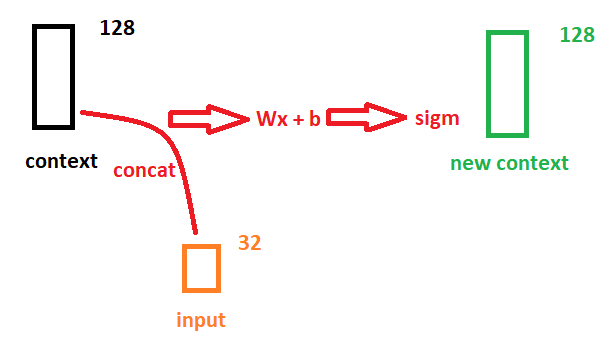

Также заметим, что каждый новый блок - не новая модель, соответственно веса для каждого нового блока одни и те же

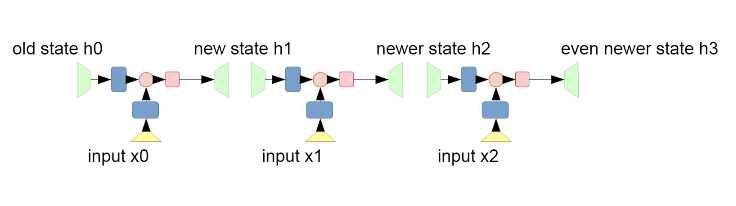

### Пункт 3

Как предсказывать новое слово? На каждом шаге, когда у нас есть новый инпут и мы порождаем новый контекст, то на основании этого контекста (вектора) предсказывать новое слово.

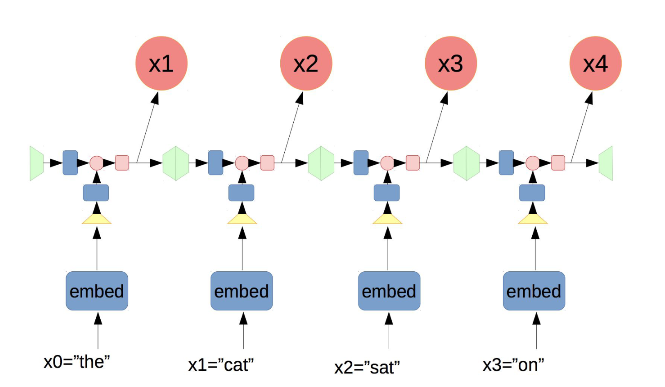

Затем мы посмотрим, какое на самом деле было новое слово и посчитаем ошибку. И получим разницу ответов. Грубо говоря, для простоты можно сказать так: мы предсказали какую-то метку класса и смотрим на правильную метку, получили ошибку, посчитали градиент и так на каждом новом шаге.

Распишем в виде формул:

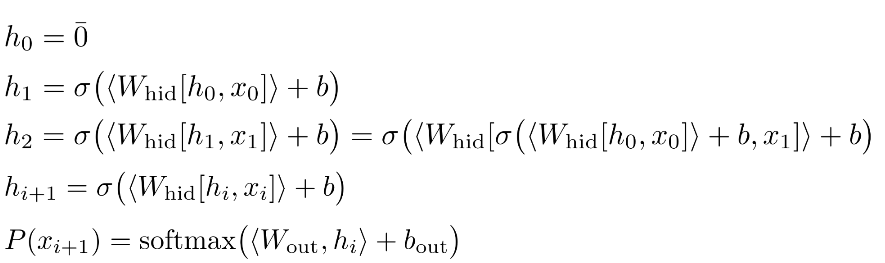

С обучением разобрались. Вопрос: как тогда генерируется текст? Всё просто. Мы получаем какре-то предсказание и скармливаем его на вход следующему блоку и тд. Стоит отметить, что если где-то модель предскажет не то слово (ошибка в любом случае будет на каком-то этапе), то дальше всё пойдет в худшую сторону и мы можем получить ахинею.

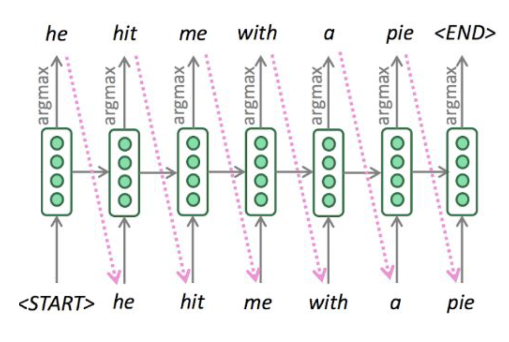

Что такое <START> и <END>? Это токены начала и конца предложений, чтобы модель понимала, где начало и когда остановиться

Подытожим: рекуррентные нейронные сети обучаются хорошо не только на текстовых данных, но и на любых других данных, где можно выделить какую-то последовательную структуру. Например, временные ряды, видео

## Пункт 4

В чём минусы данного подхода?

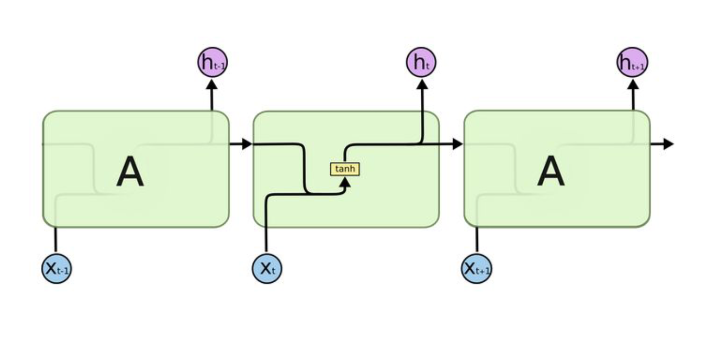



1.   Вектор контекста меняется на каждом шаге и не имеет возможности пройти на каком-то шаге неизменным. Рассмотрим пример: мы рассматриваем транскрипцию речи какого-то человека, где он использовал много междометий ("ммм", "ээ", "аа" и тд). Поэтому дальнейшие предсказания будут очень странными
2.   На данный момент наша модель запоминает всё, но хочется дать ей возможность решать самой, что нужно, а что нет



Замечания:

Почему используем внутри либо **Tanh**, либо **Sigmoid**? Почему бы не взять ReLU?

В полносвязных нейронных сетях мы, говоря о BatchNorm, Dropout и тд, упоминали, что каждый слой хочет получать на вход данные из одного и того же распределения. Если будет использована функция, которая не ограничивает данные, то после каждого преобразования может получится увеличение вектора скрытого состояния (сначла был в шкале 0-5, потом 0-100, потом 0-1000)

## Пункт 5

Исходя из проблем, описанных выше перейдём к улучшенному методу: **LSTM**

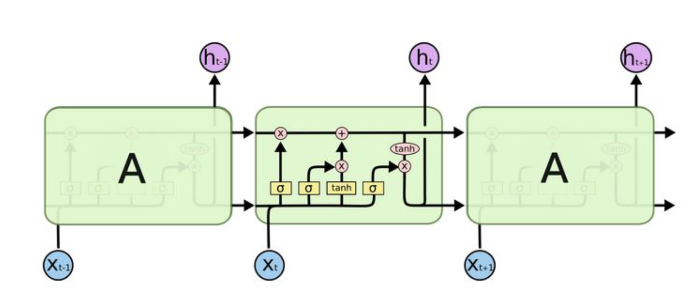

Основное отличие от "ванильного" RNN в том, что здесь два скрытых состояния: векторы долгорочной (сверху) и краткосрочной (снизу) памяти. 

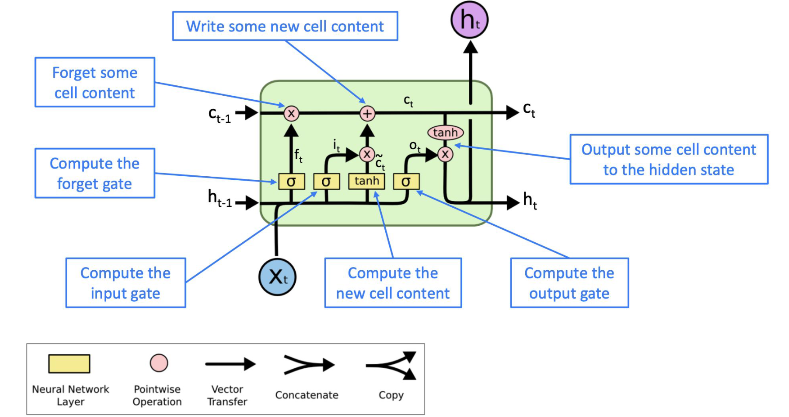

Пойдем по пунктам

**Забывание**

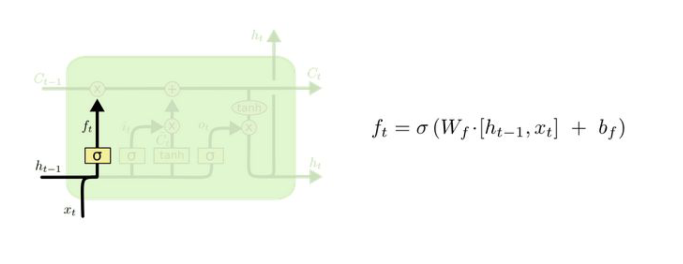

Нам нужно понять, хотим мы что-то забыть или оставить в памяти. По сути это бинарная классификация. Берём вектор краткосрочной памяти, добавляем новый инпут, умножаем всё на матрицу забывания (веса), получаем вектор из чисел между 0 и 1 в каждой ячейке и умножаем поэлементно на вектор долгосрочной памяти, после чего часть информации удалится (умножим на ноль), часть останется (умножим на 1) или уменьшится

**Запоминание**

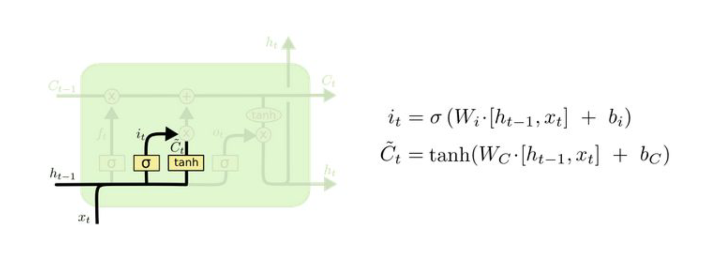

У нас есть два потока: опять бинарная классификация для определения того, что забыть и что оставить и вектор того, что запомнить, а что нет. После этого мы потоки перемножаем и добавляем в долгосрочную память

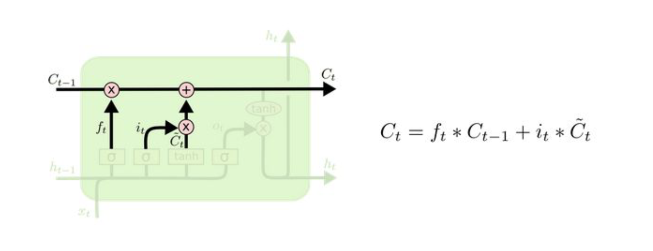

**Объединение и вывод**

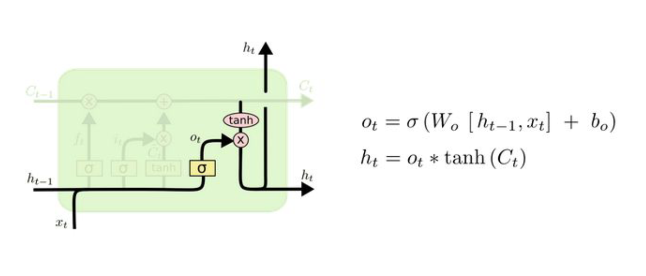

На этом потоке мы добавили в нашу краткосрочную память наш новый инпут, а затем смешали с тем, что получилось в долгосрочной и получили новый вектор

**Формулы:**

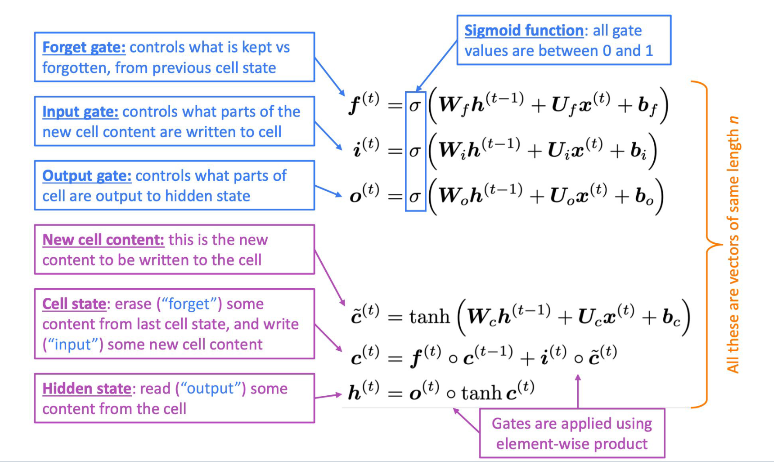

## Пункт 6

Затухание градиента - одна из самых главных проблем рекуррентной нейронной сети, поскольку мы получаем лосс в самом конце и должны прокидывать градиент тоже из конца в самое начале. Но, поскольку мы условились, что предпочтительнее использовать в качестве функций активаций **tanh** и **ReLU**, мы рискуем затушить градиент при прохождении через них. 
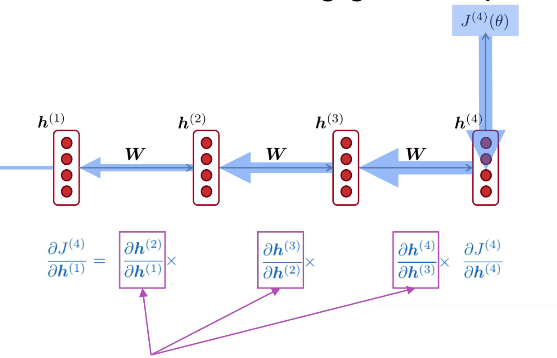

Допустим на первом переходе получили частную производную 0.1, на 2,3,4 переходе ещё не страшно. Но если таких переходов 50, то получим $10^{-50}$, что по сути 0. Поэтому градиент затухает и поскольку нет градиента, то не будет учитываться начало предложения, потому что никакого градиентного обновления в начале не будет

Если вернёмся к LSTM, то там таких проблем не будет, поскольку есть два потока, один из которых обладает всеми теми же проблемами, описанными выше, и второй (долгосрочная память), который вообще не участвует в линейных преобразованиях, а лишь перемножается и складывается. Как раз благодаря второму градиент может пройти далеко назад и учесть то, что было в начале 

В целом вся эта идея очень похожа на skip-connection в Resnet, когда мы пробросываем некоторые куски данных мимо преоброзований, чтобы потом через них мы могли прокинуть градиент

## Пункт 7

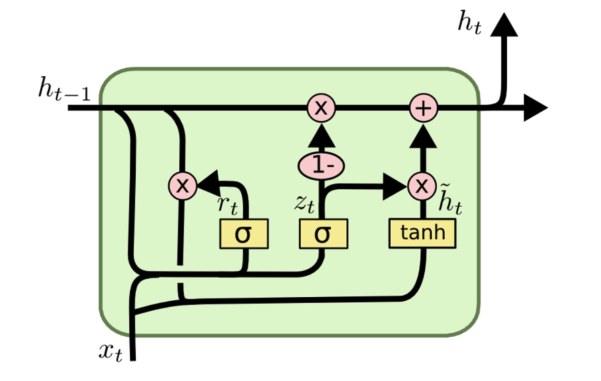

Поведение в целом немного похоже на LSTM, кроме того, что здесь одно скрытое состояние, которое копируется и по одному направлению обновляется с помощью преоброзований, а по другому сохраняется и дополняется новой инфой и что обучается GRU быстрее

## Пункт 8

Выше мы представляли вектор слова, как OHE-вектор, однако это не очень хорошо, поскольку:

 1) при большом словаре векторное представление признаков становится очень громоздким, а число параметров модели увеличивается; 
 
 2) one-hot векторы не отражают близости различных слов словаря (если она существует)

 Также есть другой подход, который называется Bag of Words, где мы подсчитываем количество вхождений каждого слова в предложении, но не учитывают порядок:

 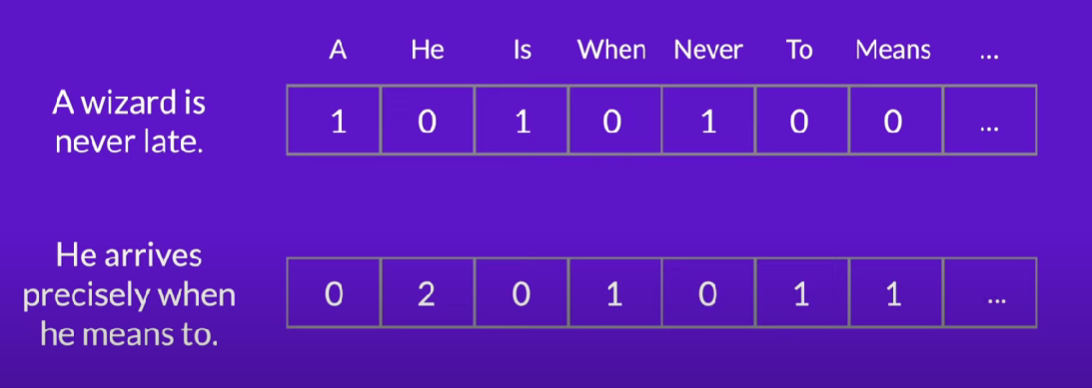 

Для устранения этих недостатков используют векторы относительно небольшой размерности с вещественными компонентами. Такой подход называется Embedding или Word2Vec. Значения компонент векторов обычно определяют в процессе обучения. Предполагается, что векторы в N-мерном пространстве будут объединяться в кластеры по семантической (смысловой) близости слов, что упрощает обучение других слоёв модели

С каждым словом $w_i$ словаря V мы хотим связать вектор $u_i = (u_{i0}, ..., u_{iN-1} )$ так, чтобы семантически близкие слова имели схожие векторы. В результате этого слова dog, cat, rabbit в векторном пространстве должны оказаться рядом (образовать кластер) и при этом быть в отдалении от кластера слов car, bus, train. Семантическая близость двух слов приводит к тому, что в текстах они встречаются в одинаковом контексте, т.е.в среднем их окружают одни и те-же слова

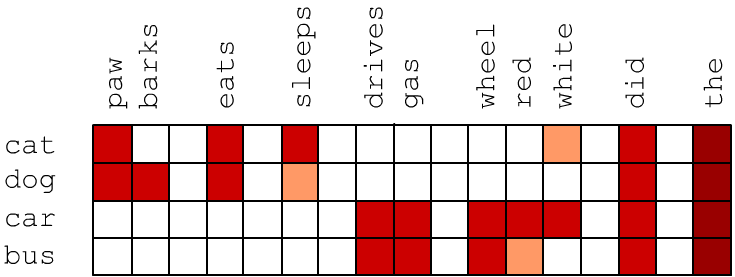

**Word2vEc**

Эффективность Word2Vec обусловлена ​​его способностью группировать векторы похожих слов. Имея достаточно большой набор данных, Word2Vec может сделать точную оценку значения слова на основе его появления в тексте. Эти оценки дают ассоциации слов с другими словами в корпусе. Например, такие слова, как «Король» и «Королева», будут очень похожи друг на друга.

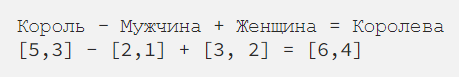

Есть две основные архитектуры word2vec: skip-gram и CBOW

**CBOW**

Эта архитектура очень похожа на нейронную сеть с прямой связью. Эта архитектура модели по существу пытается предсказать целевое слово из списка слов контекста. Интуиция, лежащая в основе этой модели, довольно проста: учитывая фразу "Have a great day", мы выберем наше целевое слово как «а», а наши контекстные слова как [«have», «great», «day»]. Что эта модель будет делать, так это использовать распределенные представления слов контекста, чтобы попытаться предсказать целевое слово.


**Skip-gram**

В этой архитектуре он принимает текущее слово в качестве входных данных и пытается точно предсказать слова до и после этого текущего слова. Эта модель по существу пытается изучить и предсказать слова контекста вокруг указанного входного слова. 

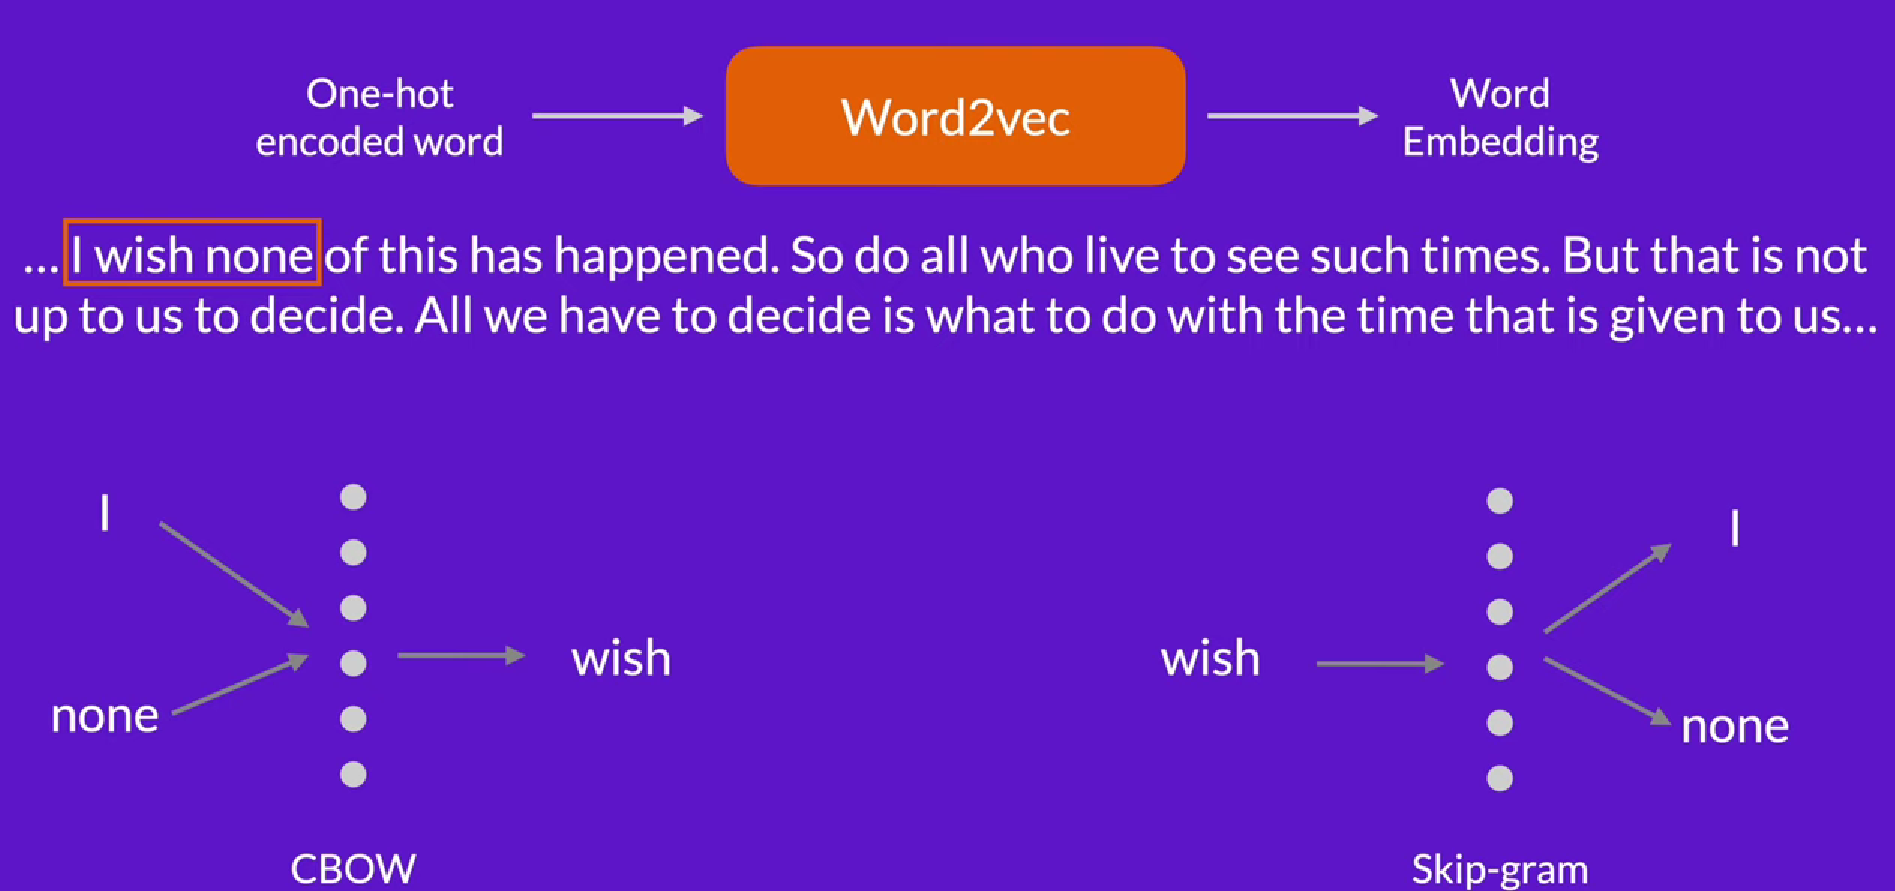

## Пункт 9

### Embeddings

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.6 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [6]:
from google.colab import files


uploaded = files.upload()

Saving shakespeare.txt to shakespeare.txt


In [8]:
import pandas as pd
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

import nltk
nltk.download('stopwords')
nltk.download('punkt')

PATH = 'shakespeare.txt'
sw = stopwords.words('english')
plt.style.use('ggplot')

lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
lines = [line.rstrip('\n') for line in lines]

lines = [line.lower() for line in lines]

lines = [line.translate(str.maketrans('', '', string.punctuation)) for line in lines]

lines = [word_tokenize(line) for line in lines]

def remove_stopwords(lines, sw = sw):
    
    res = []
    for line in lines:
        original = line
        line = [w for w in line if w not in sw]
        if len(line) < 1:
            line = original
        res.append(line)
    return res
    
filtered_lines = remove_stopwords(lines = lines, sw = sw)

In [17]:
filtered_lines[:3]

[['act'],
 ['scene', 'london', 'palace'],
 ['enter',
  'king',
  'henry',
  'lord',
  'john',
  'lancaster',
  'earl',
  'westmoreland',
  'sir',
  'walter',
  'blunt',
  'others']]

In [24]:
w = w2v(
    filtered_lines,
    min_count=3,  
    sg = 1,       
    window=7      
)       

emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)

emb_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
circumstance,-0.033708,0.187667,0.103808,-0.027332,0.029604,-0.174811,0.178212,0.438085,-0.116457,-0.089363,...,0.329170,0.028126,0.086625,0.082320,0.344985,0.233003,-0.000680,-0.153166,0.214217,0.042900
south,-0.040966,0.062174,0.105127,-0.093396,-0.047332,-0.178946,0.125607,0.315351,-0.144380,0.011444,...,0.313672,-0.000758,0.165408,0.087198,0.177576,0.226232,0.030512,-0.255357,0.195794,0.018096
injurious,-0.023421,0.141710,0.155241,-0.045718,-0.001857,-0.185683,0.144672,0.344570,-0.103611,-0.018241,...,0.267346,0.037934,0.111336,0.084590,0.268981,0.230176,-0.021987,-0.149030,0.180914,-0.009070
nonpareil,-0.017907,0.067293,0.059058,-0.026812,0.007870,-0.094561,0.059893,0.202895,-0.063340,-0.018501,...,0.141129,0.009301,0.046405,0.050268,0.125662,0.105617,-0.000936,-0.102957,0.114438,0.017624
replete,-0.017425,0.078777,0.083106,-0.045912,-0.011068,-0.114773,0.080346,0.270293,-0.102092,-0.006031,...,0.208138,0.017056,0.075616,0.047185,0.118983,0.154470,0.004616,-0.174249,0.145888,0.010174


In [27]:
w.wv.most_similar('villain')

[('thyself', 0.9621610045433044),
 ('traitor', 0.9564144015312195),
 ('coward', 0.9492014646530151),
 ('slave', 0.949169397354126),
 ('wherefore', 0.9480989575386047),
 ('wouldst', 0.9390196204185486),
 ('damned', 0.9368664026260376),
 ('darest', 0.9356792569160461),
 ('varlet', 0.9353379607200623),
 ('dog', 0.9351168870925903)]

In [13]:
print(emb_df.shape)

(11628, 100)


[]

<Figure size 640x480 with 0 Axes>

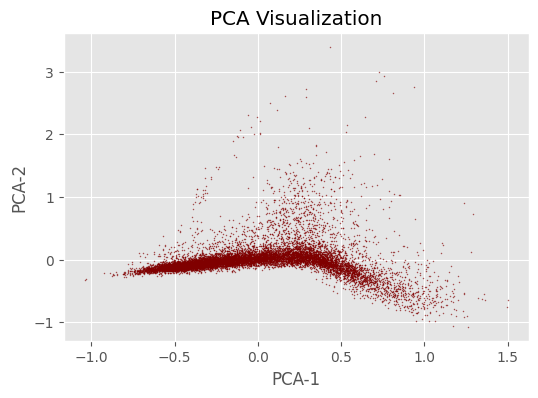

In [14]:
pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()